## COMP 361/651   Data Analytics Techniques in Python
### Assignment 9
10 possible points

Define arrays __`a1`__ and __`b1`__ as follows.

In [1]:
import numpy as np
a1 = np.arange(6, 21)
b1 = np.array([2, 3, 5])
print(a1, '\n', b1)

[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
 [2 3 5]


(__1 pt.__) Form the 15 × 3 array __`c1`__ such that __`c[i,j]`__ is __`a1[i] mod b1[j]`__. Use the __`outer()`__ method of the ufunc __`mod`__. Assign the result to __`c1`__ and display __`c1`__. Your result should be
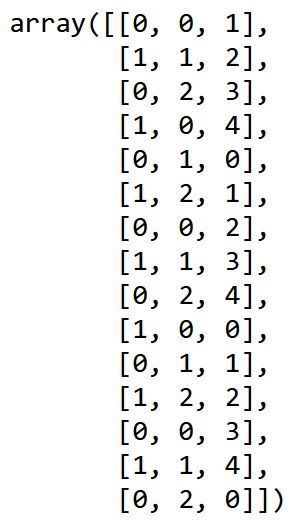

In [2]:
# Your code goes here.
c1 = np.mod.outer(a1,b1)
print(c1)

[[0 0 1]
 [1 1 2]
 [0 2 3]
 [1 0 4]
 [0 1 0]
 [1 2 1]
 [0 0 2]
 [1 1 3]
 [0 2 4]
 [1 0 0]
 [0 1 1]
 [1 2 2]
 [0 0 3]
 [1 1 4]
 [0 2 0]]


(__0.5 pt.__) Form the array of size 15 whose element at index __`i`__ is the product of the elements in row __`i`__ of __`c1`__.  (So the element at index __`i`__ in this array is nonzero if and only if __`a1[i]`__ is prime.) Use the __`reduce()`__ of ufunc __`multiply`__. The answer is
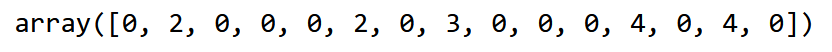

In [11]:
# Your code goes here.
np.multiply.reduce(c1,1)

array([0, 2, 0, 0, 0, 2, 0, 3, 0, 0, 0, 4, 0, 4, 0], dtype=int32)

(__0.5 pt.__) Using NumPy matrices, find the product of the inverse of
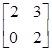
and the following (not its inverse)
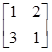

The answer should be
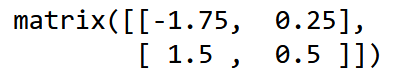

In [12]:
# Your code goes here.
M1 = np.matrix([[2,3],[0,2]])
M2 = np.matrix([[1,2],[3,1]])
print(np.linalg.inv(M1) * M2)

[[-1.75  0.25]
 [ 1.5   0.5 ]]


(__0.5 pt.__) Solve the following system of linear equations. (You may use ndarrays or NumPy matrices.) <br>
$6x_1 - 2x_2 + x_3 = 5$<br>
$-x_1 + 3x_2 - x_3 =2$<br>
$2x_1 - x_2 + 2x_3 = 0$<br>
The answer should be<br>
__`array([ 1.24,  0.8 , -0.84])`__

In [13]:
# Your code goes here.
A = np.array([[6,-2,1],[-1,3,-1],[2,-1,2]])
b = np.array([5,2,0])
np.linalg.solve(A, b)

array([ 1.24,  0.8 , -0.84])

(__0.5 pt.__) Check this answer by finding $A^{-1}$ __b__. (You may use ndarrays or NumPy matrices. If you use ndarrays, use the __`@`__ operator.) You should get the same answer as before.

In [14]:
# Your code goes here.
print(np.linalg.inv(A) @ b)

[ 1.24  0.8  -0.84]


(__1 pt.__) Suppose we have an array A as follows.
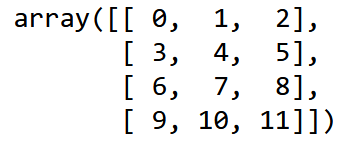

We want an array __`b`__ with exactly four elements so that __`A + b`__ is (by broadcasting)
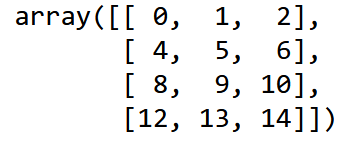
Provide the code to produce the specified array __`b`__ as well as __`A`__ and evaluate __`A+b`__.

In [15]:
# Your code goes here.
A = np.matrix([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])
b = np.matrix([[0],[1],[2],[3]])
np.matrix(A+b)

matrix([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14]])

__We now work with scikit-image__, so execute the following.

In [25]:
import matplotlib.pyplot as plt
from skimage import data

(__0.5 pt.__) In the __`skimage.data`__ submodule, call __`immunohistochemistry()`__, and assign the image it returns (an ndarray) to the variable __`img`__. (This will produce a deprecation warning. Ignore it.) Show the image. It should appear as follows.
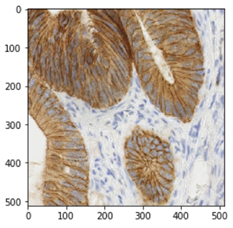

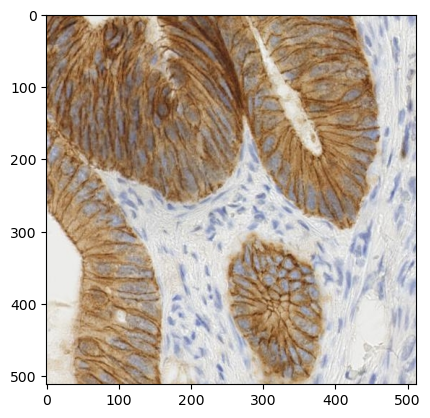

In [17]:
# Your code goes here.
img = data.immunohistochemistry()
plt.imshow(img)

(__0.5 pt.__) Pass __`im`__ to the __`rescale_intentisty()`__ function in the __`skimage.exposure`__ submodule, and assign the image it returns the variable __`better_contrast`__. Show this new image. It should appear as follows.
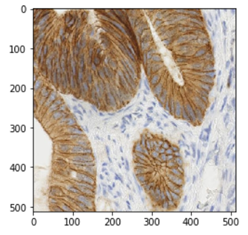

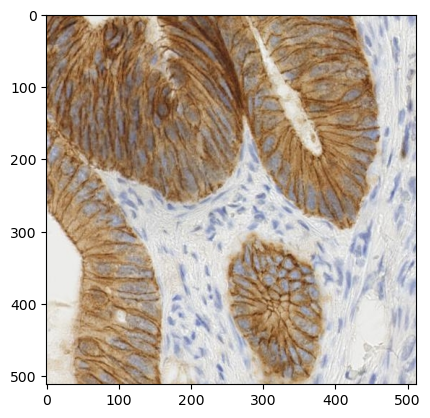

In [18]:
# Your code goes here.
from skimage import exposure
better_contrast = exposure.rescale_intensity(img)
plt.imshow(better_contrast)

(__0.5 pt.__) To get still better contrast, clip the pixel values in __`img`__ using percentiles of the image __`img`__. See slide 30. Find percentiles that give contrast as in the following image. Save the image to file. Use the __`imsave()`__ function in the __`skimage.io`__ submodule.
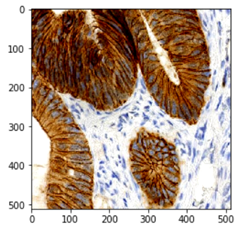

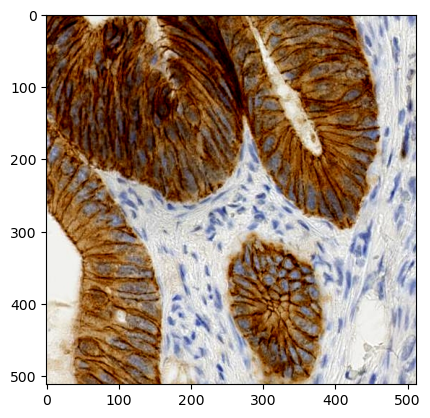

In [19]:
# Your code goes here.
from skimage.io import imsave
v_min , v_max = np.percentile(img, (7.5, 99.8))
better_contrast = exposure.rescale_intensity(img, in_range=(v_min,v_max))
plt.imshow(better_contrast)
imsave('better_contrast.png', better_contrast)

__New Series of Cells__<br>
Now we have a series of cells where we get the image of a full coffee cup on a saucer, find its shape, and black out the strips to the left and right of the saucer. We assign intermediate results to variables and show them. 

(__0.5 pt.__) In the __`skimage.data`__ submodule, call __`coffee()`__, and assign the image it returns (an ndarray) to the variable __`cf`__. Show the image. It shoudl appear as follows.
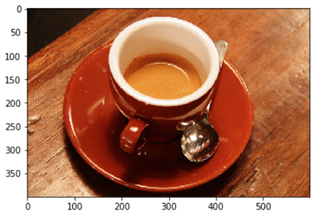

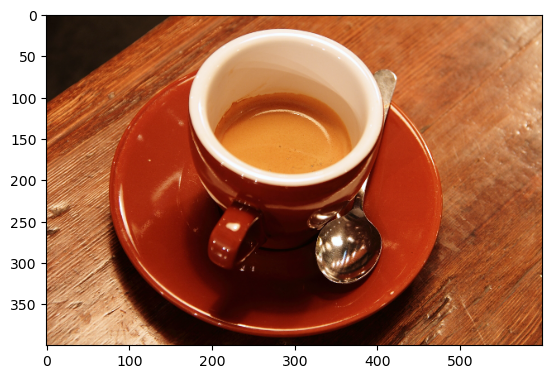

In [20]:
# Your code goes here.
cf = data.coffee()
plt.imshow(cf)

(__0.5 pt.__) Find the shape of __`cf`__. It should be __`(400, 600, 3)`__.

In [21]:
# Your code goes here.
cf.shape

(400, 600, 3)

(__0.5 pt.__) Assign a deep copy of __`cf`__ to __`cf1`__. Black out a strip to the left of the saucer and a strip to the right of the saucer in __`cf1`__ and show the result. It should appear as follows. You'll have to experiment with different widths of the strips.
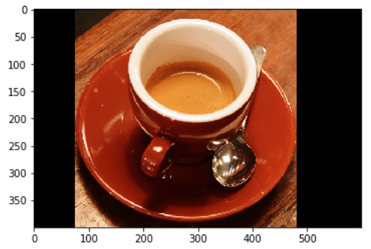

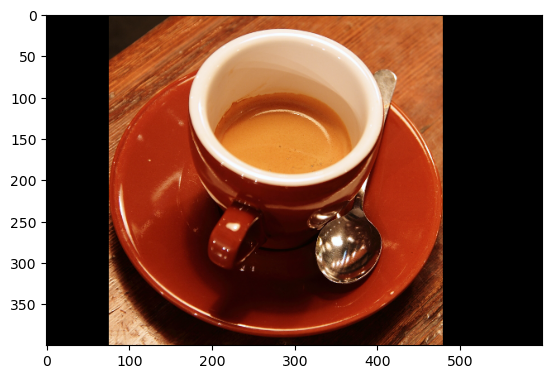

In [82]:
# Your code goes here.
import copy
cf1 = copy.deepcopy(cf)
cf1[:400, :76]  = 0
cf1[:400, 480:600] = 0
plt.imshow(cf1)

(__0.5 pt.__) Assign a deep copy of the slice of the non-blacked-out part of __`cf1`__ to __`center_cf`__ and show it. It should appear as follows. 
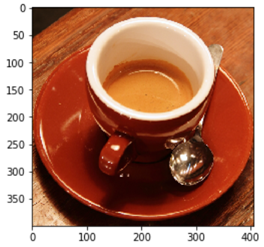

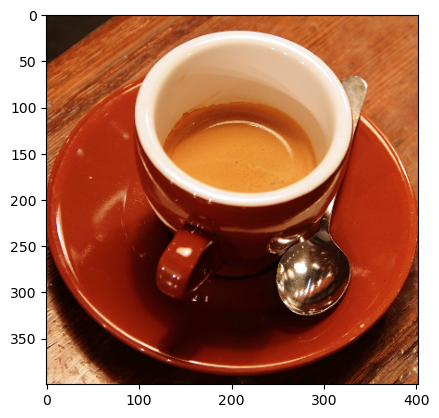

In [108]:
# Your code goes here.
center_cf = copy.deepcopy(cf1[:400, 77:479])
plt.imshow(center_cf)

__Euclidean Transformation__<br>
(__1 pt.__) Now rotate the cropped image, __`center_cf`__, CCW 45 degrees while keeping the cup and saucer within the boundaries of the image. So, besides a rotation, you must specify a translation. Finding the right translation is made difficult by the fact that the rotation is done before the translation. You will have to experiment with various translations. See Slides 34-36. Show the result. It should appear as follows.
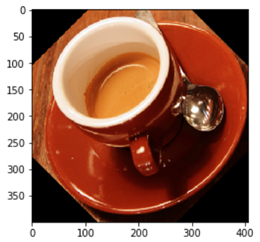

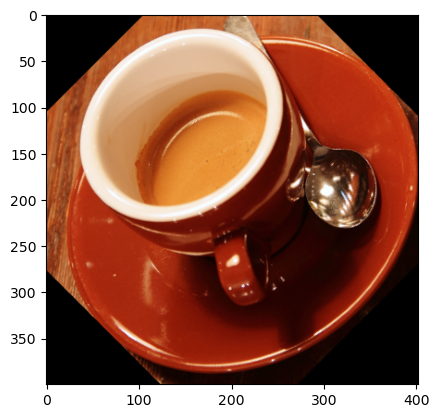

In [155]:
# Your code goes here.
from skimage import transform
from skimage import img_as_float
img = img_as_float(center_cf)
tform = transform.EuclideanTransform(
rotation = np.pi / 4.,
translation = (195, -75)
)
tf_img = transform.warp(img, tform)
plt.imshow(tf_img)

__New Series of Cells: Edge-based Segmentation__<br>
We now do edge-based segmentation to find the surface of the coffee in the cup. See Slides 39

(__1 pt.__) Use the __`rgb2gray()`__ function in the __`skimage.color`__ submodule to convert the original __`cf`__ image to grayscale, assigning it to __`cfgs`__. Apply the Canny detector of __`skimage.feature.canny()`__ to get the edges of __`cfgs`__. Assign this image to __`edges`__ and show it, specifying the gray colormap: __`cmap=plt.cm.gray`__. It should appear as follows.
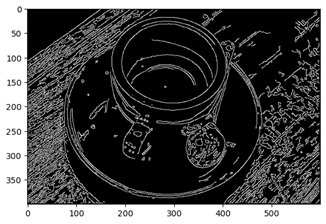

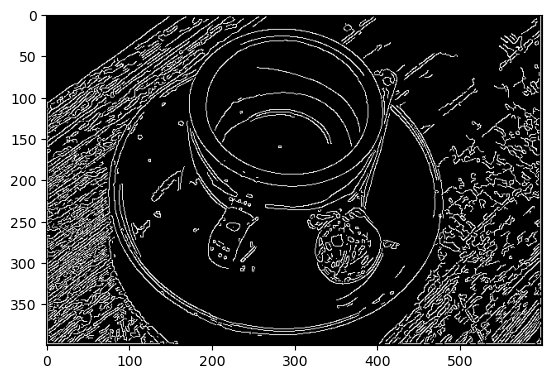

In [32]:
# Your code goes here.
from skimage.feature import canny
from skimage.color import rgb2gray
cfgs = rgb2gray(cf)
edges = skimage.feature.canny(cfgs)
plt.imshow(edges , cmap=plt.cm.gray)

(__0.5 pt.__) Apply the __`binary_fill_holes()`__ function of the __`scipy.ndimage`__ submodule to __`edges`__, assigning the result to __`fill_cfgs`__. Show it, specifying the gray colormap: __`cmap=plt.cm.gray`__. It should appear as follows.
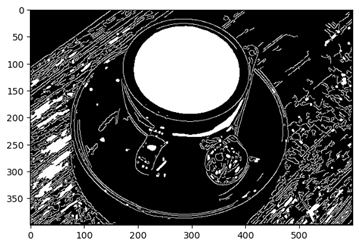

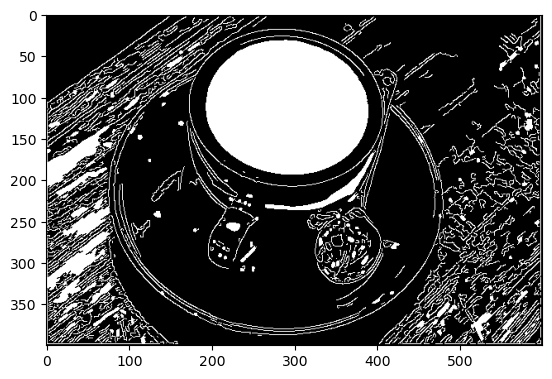

In [38]:
# Your code goes here.
from scipy import ndimage
fill_cfgs = ndimage.binary_fill_holes(edges)
plt.imshow(fill_cfgs, cmap= plt.cm.gray)